---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

---

- Estudiante: **Javier Madrigal Oviedo**
- Carné: **B74368**
- Grupo: **1**

- Estudiante: **Daniel Ferreto Chavarría**
- Carné: **B82958**
- Grupo: **1**

- Estudiante: **Juan Pablo Madrigal**
- Carné: **A32951**
- Grupo: **1**

# Proyecto 5 - *Procesos M/M/s*

 El caso especial de los procesos aleatorios donde existen "estados" y "transiciones" entre estos estados, las cadenas de Markov modelan las probabilidades de transición y el tiempo de permanencia entre cada estado. En particular, la teoría de colas describe la evolución del número de elementos en la fila, dado un flujo de entrada y un flujo de salida.

La simulación de un sistema del tipo M/M/S como el estudiado implica la generación de una llegada de "clientes" como una corriente de Poisson,es decir que tienen una distribución de probabilidad de tiempo entre arribos con distribución exponencial y parámetro 𝜆. 

Con una cantidad s de servidores el tiempo total de servicio viene dado por s$\upsilon$

En este proyecto se estudia un escenario de un proceso de vacunación con ciertas condiciones de tiempos de servicio y tiempos de espera, a partir de las cuales se debe determinar un número de servidores para que el sistema no exceda 100 personas en fila durante el 95% del tiempo de servicio.

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 7$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.


Como primer tarea a realizar es la obtención de el número de servidores requeridos para que el 95% del tiempo no hayan mas de 100 clientes en la cola de espera.

Luego se procede a realizar una simulacion del proceso para determinar que el valor teórico obtenido de servidores permiten cumplir con los requisistos y se analizan los resultados.



---

## Parte 1. Determinación teórica del número s de servidores necesarios para cumplir el requisito ##

Se brinda la siguiente información, la cual es vital para el desarrollo del ejercicio: 

-Tasa de llegada $\lambda$ = 7 personas por minuto

-Tasa de servicio $\upsilon$ = 0.25 personas por minuto 

-El sistema no debe exceder a las 100 personas en la fila durante el $95\%$ del tiempo


Dada la tercera premisa, se tiene que en el sistema deben haber 100 clientes durante el desarrollo del tiempo, por lo tanto se tiene la siguiente condición: \\


$$
P(\text{Con 101 o más clientes en el sistema}) = \sum_{i=101}^{\infty} (1-\rho)\rho^i
$$



Y se tiene que p viene definida por la siguiente expresión: 

$$
\rho = \frac{\lambda}{s\upsilon}
$$

$$
\rho = \frac{7}{s\cdot 0.25} = \frac{28}{s}
$$

Dado que se tiene que el sistema no debe superar el $95\%$ se tiene que la cantidad asociada es el $5\%$ o 0.05, dado esto se tiene la siguiente ecuación: 

$$
\displaystyle\sum_{i=101}^{\infty} (1-p)\cdot p^i = \displaystyle\sum_{i=101}^{\infty} (1-\frac{28}{s})\cdot (\frac{28}{s})^i \leq 0.05
$$

$$
\displaystyle\sum_{i=0}^{100} (1-\frac{28}{s})\cdot (\frac{28}{s})^i \leq 0.05
$$

Computando la expresión en la aplicación mathematica, se obtiene que el valor obtenido para el número de servidores es el siguiente: 

$$
S \geq 28.8429 \approx 29
$$

Este último resultado, lo que nos dice es que la cantidad de servidores que deben de haber para cumplir con las condiciones del servicio, tienen que haber al menos 29 servidores para cumplir con el requisito.

Una forma de determinar la coherencia en los resultados es comprobar el resultado obtenido para los servidores, se tiene que cumplir el siguiente requisito: 

$$
    \rho < 1 
$$

$$
    \rho = \frac{\lambda}{s\cdot \upsilon} = \frac{28}{28.8429} = 0.9708
$$

$$
    0.9708 < 1 
$$

**Con lo cual, se comprueba, que el resultado obtenido, cumple con esta última condición.**

## Parte 2. Desarrollo del código de programación ##

Se procede a implementar el código como una función para poder hacer simulaciones únicamente variando el argumento de entrada.

In [7]:
def sim(servidores):
    import numpy as np
    from scipy import stats
    import matplotlib.pyplot as plt

    # Número de clientes
    #suponiendo una cantidad de 1000 clientes
    N = 1000

    #usando la cantidad de servidores determinada de manera teorica

    # Parámetro de llegada (clientes/segundos)
    lam = 7/60

    # Parámetro de servicio (servicios/segundos)
    #nu con la varibale de servidores !=1
    nu = (0.25/60)*servidores
   
 
    # Distribución de los tiempos de llegada entre cada cliente
    X = stats.expon(scale = 1/lam)

    # Distribución de los tiempos de servicio a cada cliente
    Y = stats.expon(scale = 1/nu)

    # Intervalos entre llegadas (segundos desde último cliente)
    t_intervalos = np.ceil(X.rvs(N)).astype('int')

    # Tiempos de las llegadas (segundos desde el inicio)
    t_llegadas = [t_intervalos[0]]
    for i in range(1, len(t_intervalos)):
        siguiente = t_llegadas[i-1] + t_intervalos[i]
        t_llegadas.append(siguiente)

    # Tiempos de servicio (segundos desde inicio de servicio)
    t_servicio = np.ceil(Y.rvs(N)).astype('int')

    # Inicialización del tiempo de inicio y fin de atención
    inicio = t_llegadas[0]          # primera llegada
    fin = inicio + t_servicio[0]    # primera salida

    # Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
    t_atencion = [inicio]
    for i in range(1, N):
        inicio = np.max((t_llegadas[i], fin))
        fin = inicio + t_servicio[i]
        t_atencion.append(inicio)

    # Inicialización del vector temporal para registrar eventos
    t = np.zeros(t_atencion[-1] + t_servicio[-1] + servidores)

    # Asignación de eventos de llegada (+1) y salida (-1) de clientes
    for c in range(N):
        i = t_llegadas[c]
        t[i] += 1
        j = t_atencion[c] + t_servicio[c]
        t[j] -= 1

    # Umbral de P o más personas en sistema (hay P - servidores en fila)
    P = (100+servidores) #cambiando el umbral para el numero de servidores

    # Instantes (segundos) de tiempo con P o más solicitudes en sistema
    exceso = 0

    # Proceso aleatorio (estados n = {0, 1, 2...})
    Xt = np.zeros(t.shape)

    # Inicialización de estado n
    n = 0

    # Recorrido del vector temporal y conteo de clientes (estado n)
    for i, c in enumerate(t):
        n += c # sumar (+1) o restar (-1) al estado
        Xt[i] = n
        if Xt[i] >= P: 
            exceso += 1

    # Fracción de tiempo con P o más solicitudes en sistema
    fraccion = exceso / len(t)

    # Resultados
    print('Parámetro lambda =', str(lam*60))
    print('Parámetro nu =', str(nu*60/servidores))
    print('Cuenta con una cantidad de servidores de =',str(servidores))
    print('Tiempo con más de {} solicitudes en fila:'.format(P-servidores))
    print('\t {:0.2f}%'.format(100*fraccion))
    if fraccion <= 0.05:
        print('\t Sí cumple con la especificación.')
    else:
        print('\t No cumple con la especificación.') 
    print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))
  
    # Gráfica de X(t) (estados del sistema)
    plt.figure()
    plt.plot(Xt)
    plt.plot(range(len(t)), (P-servidores)*np.ones(t.shape))
    plt.title("Simulación con {} servidores".format(servidores))
    plt.legend(('$X(t) = n$', '$L_q = $' + str(P-servidores)))
    plt.ylabel('Clientes en el sistema, $n$')
    plt.xlabel('Tiempo, $t$ / segundos')
    plt.xlim((0, 5000))
    plt.show()

# 3) *Simulación y Análisis de Resultados*
Se realizan 3 simulaciones con diferentes número de servidores para verificar resultados

### Simulación con 29 servidores 

Parámetro lambda = 7.0
Parámetro nu = 0.25
Cuenta con una cantidad de servidores de = 29
Tiempo con más de 100 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 2.54 horas.


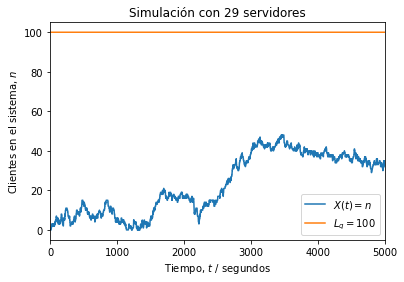

In [12]:
sim(29)

### Simulación con 35 servidores

Parámetro lambda = 7.0
Parámetro nu = 0.25
Cuenta con una cantidad de servidores de = 35
Tiempo con más de 100 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 2.63 horas.


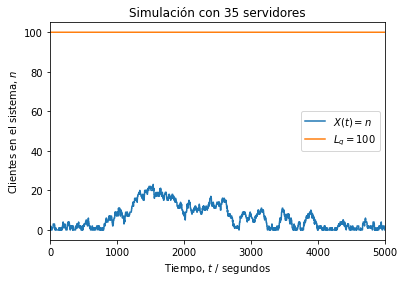

In [14]:
sim(35)

### Simulación con 18 servidores

Parámetro lambda = 7.0
Parámetro nu = 0.25
Cuenta con una cantidad de servidores de = 18
Tiempo con más de 100 solicitudes en fila:
	 72.62%
	 No cumple con la especificación.
Simulación es equivalente a 3.92 horas.


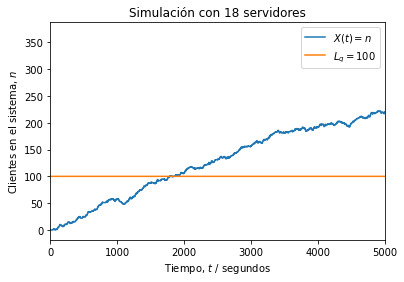

In [5]:
sim(18)

---
##  Analisis de Resultados

A partir de la verificacion del valor de $\rho = \frac{\lambda}{s\cdot \upsilon} = \frac{28}{28.8429} = 0.9708 < 1 $ podemos estar  convencidos con un grado aceptable de confiabilidad de que la cantidad de servidores requerida para alcanzar los requisitos del sistema son correctos
    
    
Para las simulaciones realizadas X(t) representa los estados del proceso M/M/s.
En este caso representa personas en cola esperando ser vacunadas por alguno de los "servidores".

$L_{q}$ representa el umbral de 100 personas en espera de ser atendido.

Se elige un N=1000 para realizar las simulaciones que nos brindan una precisión de hasta el 0,001 lo cual se considera aceptable


### 29 Servidores 
Tiempo con más de 100 solicitudes en fila:0.00%.

Sí cumple con la especificación.

Simulación es equivalente a 2.54 horas.
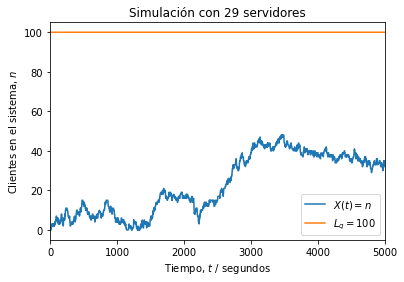

Para la simulación con 29 servidores que se aprecia en la imagen anterior se puede corroborar los resultados obtenidos programaticamente que indican que el tiempo de permanencia en un estado con más de 100 solicitudes en fila es de 0%.  


### 35 Servidores 
Tiempo con más de 100 solicitudes en fila:0.00%.

Sí cumple con la especificación.

Simulación es equivalente a 2.63 horas.
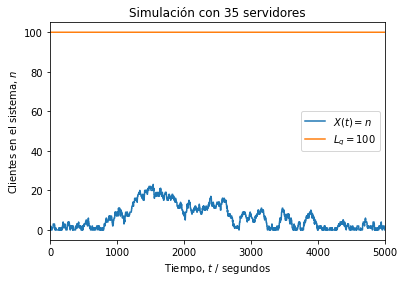

Para el mismo proceso pero pero con una cantidad mayor de servidores, 35 es este caso, se observa el comportamiento esperado en el cual no ocurren estados con mas de 100 personas en espera


Una de las observaciones interesantes es que se puede pensar intuitivamente que a mayor número  servidores se debería tardar menos tiempo en atender la misma cantidad de clientes, pero al ver con mas detalle los resultados obtenidos para 29 y 35 servidores respectivamente se aprecia que las simulaciones son equivalentes a 2.54 y 2.63 horas.
El proceso en el que se manejaron 29 servidores tardo menos que el proceso con 35 servidores para atender la misma  cantidad (1000) clientes.

Esto se puede deber a que aunque existe un tiempo promedio de servicio es posible que los clientes de la cola requieran mas tiempo por situaciones imprevistas de origen aleatorio.


### 18 servidores
Tiempo con más de 100 solicitudes en fila: 72.62%.

No cumple con la especificación.

Simulación es equivalente a 3.92 horas.
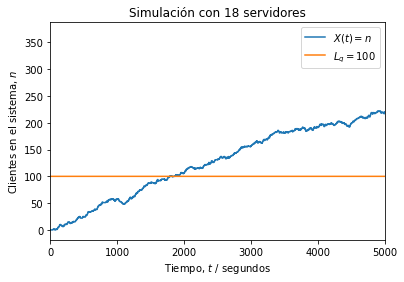

Para el caso en que se tienen mucho menos servidores de los necesarios para cumplir con los requerimientos claramente se observa en la gráfica como existe una parte considerable del tiempo donde los estados presentan mas de 100 clientes en la cola 



---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---